# Machine Learning Exercise

Choose one of machine learning method and build a classifier on the iris data set. 

Step 1: Load data set.

(Hint: in this step, you import the needed packages, such as numpy, matplotlib, pandas and seaborn. Load data to a `DataFrame` object. Check the dataframe object properties, such as shape and head rows.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
iris = pd.read_csv("iris.csv", header=None, names=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class'])
print(iris.shape)
iris.head()

(150, 5)


,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Step 2: Check every column's information in the `iris` DataFrame.

(Hint: `DataFrame.info()` is very useful to know column information.)

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


To play safe, you can do a survey to check whether there is any `NaN` data in data set.

In [4]:
iris.isna().values.any()

False

Step 3: Do a quick descriptive summary statistics

In [5]:
iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


And count the unique data to know the numer of classes of iris flowers.

In [6]:
print(iris["Class"].unique())
print()
print("There are", iris['Class'].nunique(), "unique classes of iris flowers.")

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

There are 3 unique classes of iris flowers.


Step 4. Explore the data by visulization.

The easiest way is to plot pairplot to check data distribution on a two-diemensional space.

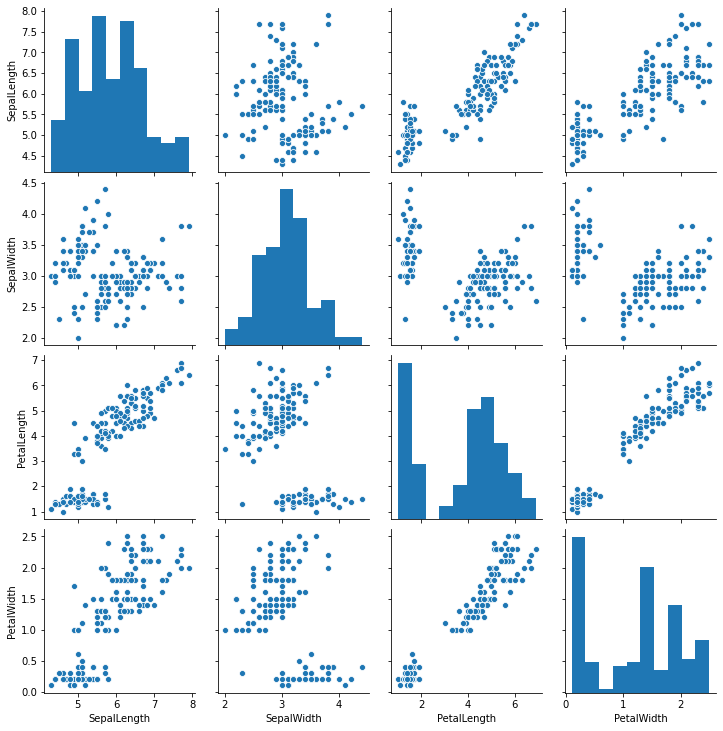

In [7]:
sns.pairplot(iris)

Also, it is important to know the correlation among attributes in data


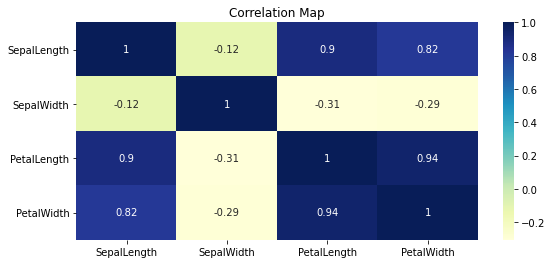

In [8]:
iris_cat = iris.copy()
iris_cat['SepalLength'] = iris_cat['SepalLength'].astype('category')
iris_cat['SepalWidth'] = iris_cat['SepalWidth'].astype('category')
iris_cat['PetalLength'] = iris_cat['PetalLength'].astype('category')
iris_cat['PetalWidth'] = iris_cat['PetalWidth'].astype('category')

category = iris_cat.select_dtypes(['category']).columns
categorized = iris_cat[category].apply(lambda x: x.cat.codes)

corr = categorized.corr()

plt.figure(figsize=(9,4))
ax = sns.heatmap(corr, annot=True, cmap="YlGnBu")
_ = ax.set_title('Correlation Map')

Step 5. split the data into train and validation set and then standardize the data



In [9]:
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler

features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']

# Separating out the features
X = iris.loc[:, features].to_numpy()

# Separating out the target
Y = iris['Class'].to_numpy()

# Standardizing the features
X = StandardScaler().fit_transform(X)

#train test split
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=7)

Step 6: Use PCA to reduce feacture space.

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc = pca.fit_transform(X)

pc_df = pd.DataFrame(data = pc , 
        columns = ['PC1', 'PC2'])
pc_df['Class'] = Y
print(pc_df.head())

print(pca.explained_variance_ratio_)
print()
print(np.sum(pca.explained_variance_ratio_))

        PC1       PC2        Class
0 -2.264542  0.505704  Iris-setosa
1 -2.086426 -0.655405  Iris-setosa
2 -2.367950 -0.318477  Iris-setosa
3 -2.304197 -0.575368  Iris-setosa
4 -2.388777  0.674767  Iris-setosa
[0.72770452 0.23030523]

0.9580097536148199


Step 7: Construct a classifier, here we use logistic regression algorithm:
(You can choose other algorithm too.)

In [12]:
## Your code starts here
from sklearn.linear_model import LogisticRegression
logistic_regression= LogisticRegression(solver='lbfgs')
logistic_regression.fit(X_train,Y_train)
Y_test_pred=logistic_regression.predict(X_test)    # y_test_pred holds the prediction results based on X_test

print(type(Y_test_pred))
print(Y_test_pred.shape)
print(type(Y_test))
print(Y_test.shape)

<class 'numpy.ndarray'>
(30,)
<class 'numpy.ndarray'>
(30,)


Step 8: Model validation: accuracy_score, confusion matrix and others

Firstly, write a your own general function to evaluate the model, the function should report accuracy, confusion matrix, and evaluation report.

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

def validate(y_test, y_test_pred):
    # accuracy
    print('Accuracy: ', accuracy_score(y_test, y_test_pred))
    print()
    
    # confusion matrix
    confusion_matrix = pd.crosstab(y_test, y_test_pred, rownames=['Actual'], colnames=['Predicted'])
    print("Confusion Matrix")
    print(confusion_matrix)

Now, call the function to evaluate the basic model

In [14]:
## Your code starts here
validate(Y_test, Y_test_pred)

Accuracy:  0.8666666666666667

Confusion Matrix
Predicted        Iris-setosa  Iris-versicolor  Iris-virginica
Actual                                                       
Iris-setosa                7                0               0
Iris-versicolor            0               10               2
Iris-virginica             0                2               9


Step 9: Use grid search to tune hyperparameters.
(You can either choose to use general procedure or algorithm dependent grid search and cross validation method.)

In [15]:
from sklearn.model_selection import GridSearchCV
logreg= LogisticRegression()

param_grid = [
    {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(0, 4, 10)}]

clf = GridSearchCV(logreg, param_grid = param_grid, cv = 5, verbose=2, n_jobs=-1)

best_clf = clf.fit(X_train, Y_train)
Y_test_pred=best_clf.predict(X_test)
print('Best Penalty:', best_clf.best_estimator_.get_params()['penalty'])
print('Best C:', best_clf.best_estimator_.get_params()['C'])
validate(Y_test, Y_test_pred)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  85 out of 100 | elapsed:    1.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.9s finished


Best Penalty: l2
Best C: 166.81005372000593
Accuracy:  0.8333333333333334

Confusion Matrix
Predicted        Iris-setosa  Iris-versicolor  Iris-virginica
Actual                                                       
Iris-setosa                6                1               0
Iris-versicolor            0               10               2
Iris-virginica             0                2               9


#### A step further:

Please try to build a pipeline to include data-preprocessing and grid search for hyperparameter.